In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## SUPERVISED MODEL

In [2]:
bank=pd.read_csv("/Users/anuraggupta/Documents/ML EXAM/bank.csv",delimiter=";")
bank.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


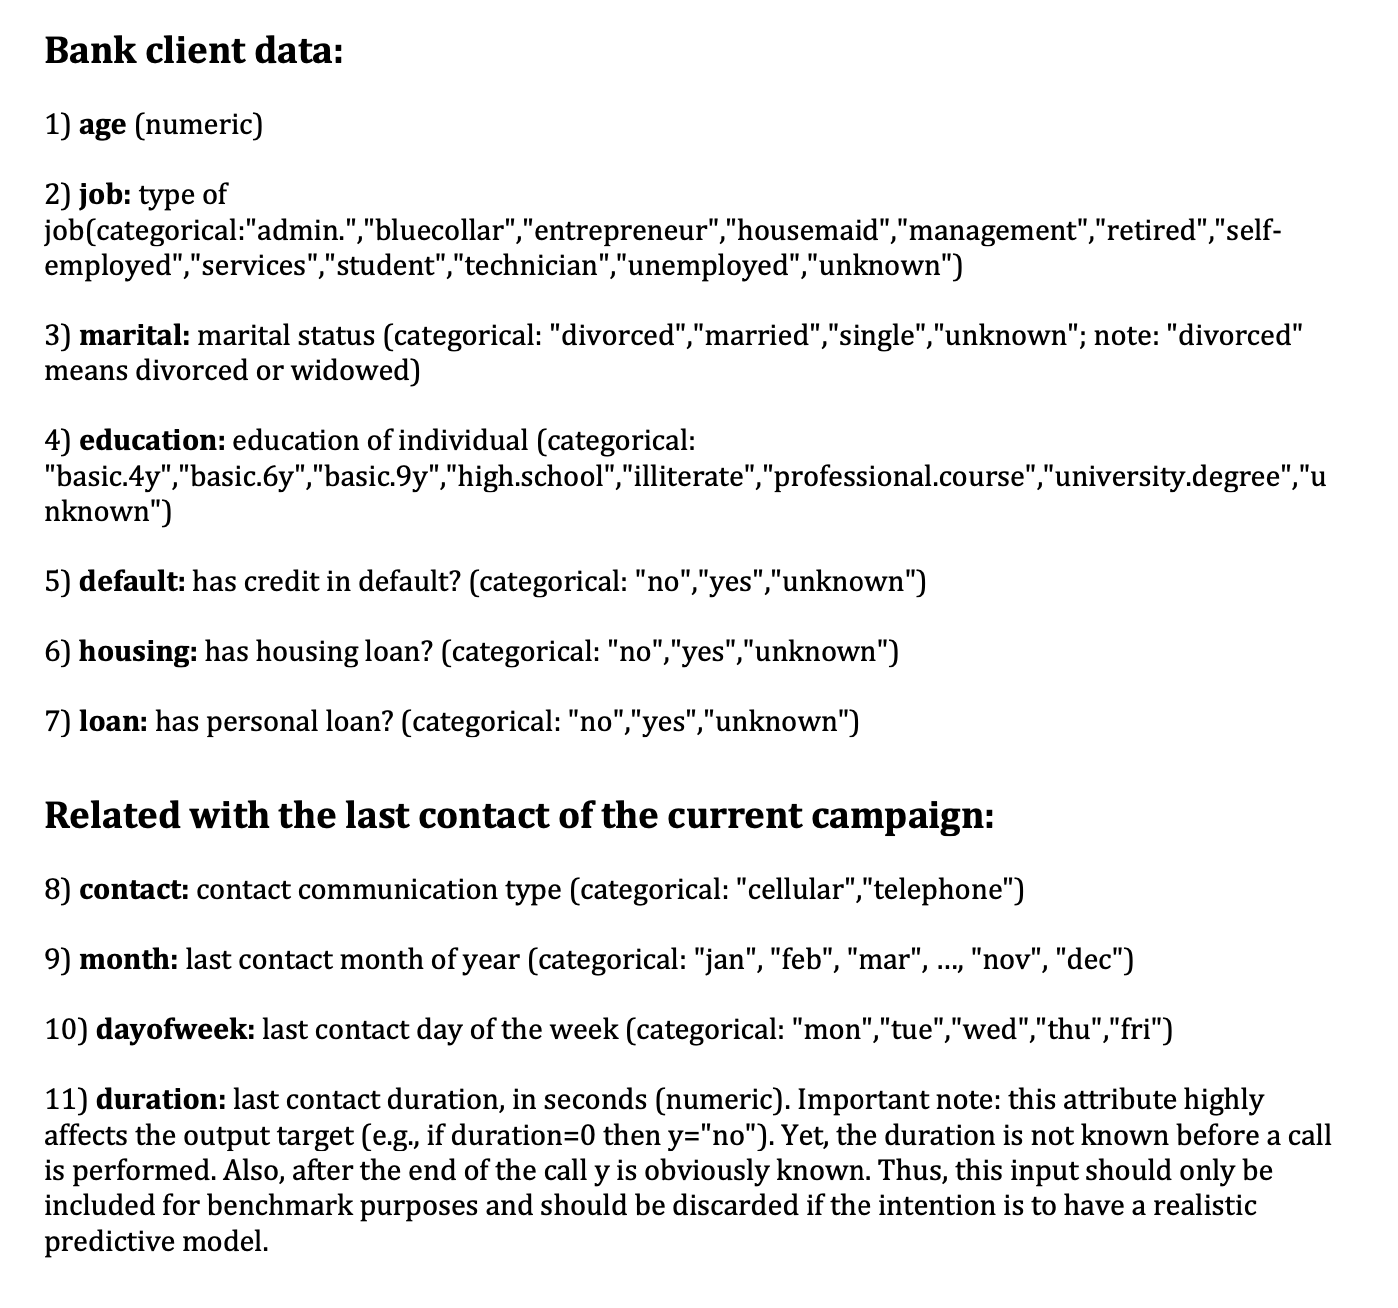

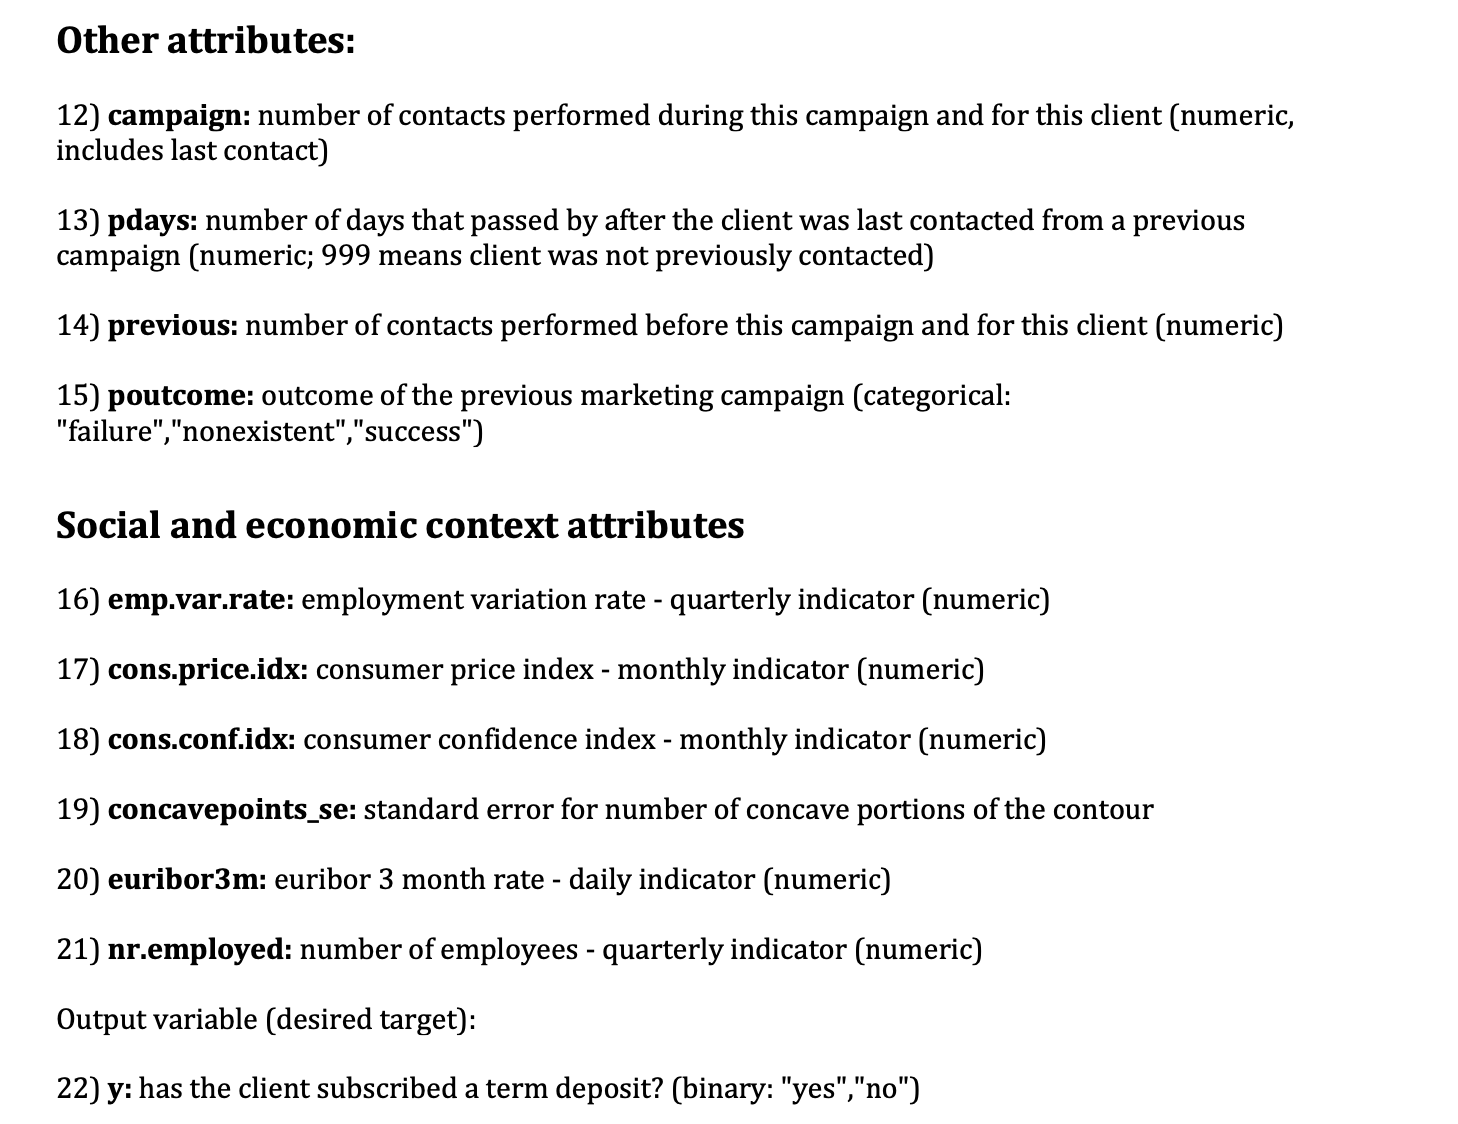

In [3]:
bank.shape

(41188, 21)

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Q1. What does the primary analysis of several categorical features reveal?

In [5]:
bank.dtypes[bank.dtypes=="object"].index   

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [6]:
def univariate_cat(data, x):
    missing=data[x].isnull().sum()
    unique_cnt=data[x].nunique()
    unique_cat=list(data[x].unique())
    f1=pd.DataFrame(data[x].value_counts())
    f1.rename(columns={x:"Count"}, inplace=True)
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:"percentage"}, inplace=True)
    f2["percentage"]=(f2["percentage"]*100).round(2).astype(str)+"%"
    ff=pd.concat([f1, f2], axis=1)
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique categories: {unique_cnt}\n")
    print(f"Unique categories :\n{unique_cat}")
    print(f"Value count and %\n", ff)
    sns.countplot(data=data, x=x)
    plt.xticks(rotation=90)
    plt.show()

Total missing values : 0

Total count of unique categories: 12

Unique categories :
['housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'retired', 'management', 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student']
Value count and %
                Count percentage
admin.         10422      25.3%
blue-collar     9254     22.47%
technician      6743     16.37%
services        3969      9.64%
management      2924       7.1%
retired         1720      4.18%
entrepreneur    1456      3.54%
self-employed   1421      3.45%
housemaid       1060      2.57%
unemployed      1014      2.46%
student          875      2.12%
unknown          330       0.8%


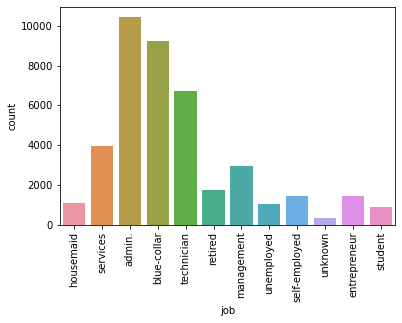

In [7]:
univariate_cat(bank, 'job')

In [8]:
bank["job"]=bank["job"].replace(["management","admin."],"White-collar")
bank["job"]=bank["job"].replace(["services","housemaid"],"Pink-collar")
bank["job"]=bank["job"].replace(["retired","student","unemployed","unknown"],"Others")
bank["job"]=bank["job"].replace(["self-employed","entrepreneur"],"self-depend")

* Here  i am combining variable on the basis of jobs.

In [58]:
yo=((round((((bank[bank['y']=='yes']['job']).value_counts())/(bank['job'].value_counts())*100),0)).astype(str))+ "%"
pd.DataFrame(yo)

,job
Others,23.0%
Pink-collar,9.0%
White-collar,13.0%
blue-collar,7.0%
self-depend,9.0%
technician,11.0%


-- As you can see most of the fraud happend in Other Category which is `Retired`, `Student`, `Unemployment` and `Unknown` 

Total missing values : 0

Total count of unique categories: 4

Unique categories :
['married', 'single', 'divorced', 'unknown']
Value count and %
           Count percentage
married   24928     60.52%
single    11568     28.09%
divorced   4612      11.2%
unknown      80      0.19%


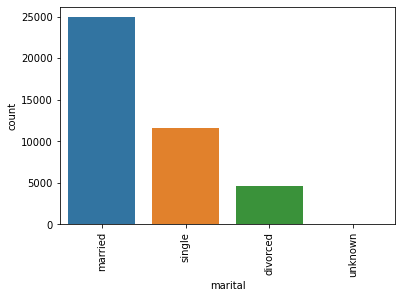

In [10]:
univariate_cat(bank,'marital')

In [59]:
((round((((bank[bank['y']=='yes']['marital']).value_counts())/(bank['marital'].value_counts())*100),0)).astype(str))+ "%"

married     10.0%
single      14.0%
divorced    10.0%
unknown     15.0%
Name: marital, dtype: object

Total missing values : 0

Total count of unique categories: 8

Unique categories :
['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown', 'university.degree', 'illiterate']
Value count and %
                      Count percentage
university.degree    12168     29.54%
high.school           9515      23.1%
basic.9y              6045     14.68%
professional.course   5243     12.73%
basic.4y              4176     10.14%
basic.6y              2292      5.56%
unknown               1731       4.2%
illiterate              18      0.04%


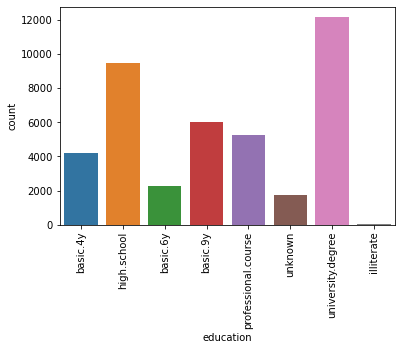

In [11]:
univariate_cat(bank,'education')

In [60]:
((round((((bank[bank['y']=='yes']['education']).value_counts())/(bank['education'].value_counts())*100),0)).astype(str))+ "%"

basic.4y               10.0%
basic.6y                8.0%
basic.9y                8.0%
high.school            11.0%
illiterate             22.0%
professional.course    11.0%
university.degree      14.0%
unknown                15.0%
Name: education, dtype: object

Total missing values : 0

Total count of unique categories: 3

Unique categories :
['no', 'unknown', 'yes']
Value count and %
          Count percentage
no       32588     79.12%
unknown   8597     20.87%
yes          3      0.01%


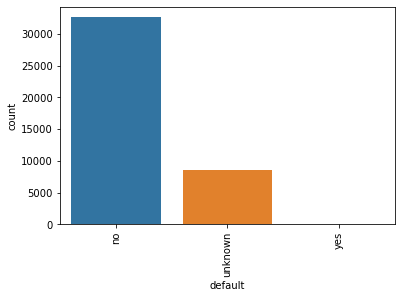

In [12]:
univariate_cat(bank,'default')

In [61]:
((round((((bank[bank['y']=='yes']['default']).value_counts())/(bank['default'].value_counts())*100),0)).astype(str))+ "%"

no         13.0%
unknown     5.0%
yes         nan%
Name: default, dtype: object

In [64]:
bank[bank['y']=='yes']['default'].value_counts()

no         4197
unknown     443
Name: default, dtype: int64

Total missing values : 0

Total count of unique categories: 3

Unique categories :
['no', 'yes', 'unknown']
Value count and %
          Count percentage
yes      21576     52.38%
no       18622     45.21%
unknown    990       2.4%


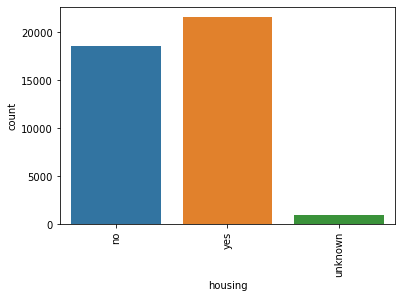

In [13]:
univariate_cat(bank,'housing')

In [65]:
((round((((bank[bank['y']=='yes']['housing']).value_counts())/(bank['housing'].value_counts())*100),0)).astype(str))+ "%"

yes        12.0%
no         11.0%
unknown    11.0%
Name: housing, dtype: object

Total missing values : 0

Total count of unique categories: 3

Unique categories :
['no', 'yes', 'unknown']
Value count and %
          Count percentage
no       33950     82.43%
yes       6248     15.17%
unknown    990       2.4%


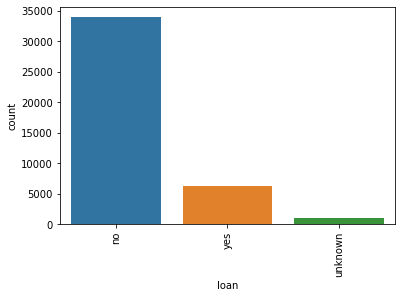

In [14]:
univariate_cat(bank,'loan')

In [66]:
((round((((bank[bank['y']=='yes']['loan']).value_counts())/(bank['loan'].value_counts())*100),0)).astype(str))+ "%"

no         11.0%
yes        11.0%
unknown    11.0%
Name: loan, dtype: object

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['telephone', 'cellular']
Value count and %
            Count percentage
cellular   26144     63.47%
telephone  15044     36.53%


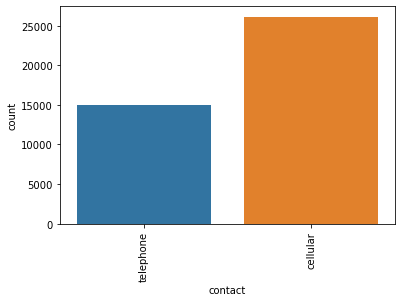

In [15]:
univariate_cat(bank,'contact')

Total missing values : 0

Total count of unique categories: 10

Unique categories :
['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep']
Value count and %
      Count percentage
may  13769     33.43%
jul   7174     17.42%
aug   6178      15.0%
jun   5318     12.91%
nov   4101      9.96%
apr   2632      6.39%
oct    718      1.74%
sep    570      1.38%
mar    546      1.33%
dec    182      0.44%


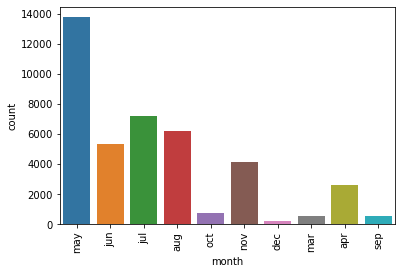

In [16]:
univariate_cat(bank,'month')

In [67]:
((round((((bank[bank['y']=='yes']['month']).value_counts())/(bank['month'].value_counts())*100),0)).astype(str))+ "%"

apr    20.0%
aug    11.0%
dec    49.0%
jul     9.0%
jun    11.0%
mar    51.0%
may     6.0%
nov    10.0%
oct    44.0%
sep    45.0%
Name: month, dtype: object

Total missing values : 0

Total count of unique categories: 5

Unique categories :
['mon', 'tue', 'wed', 'thu', 'fri']
Value count and %
      Count percentage
thu   8623     20.94%
mon   8514     20.67%
wed   8134     19.75%
tue   8090     19.64%
fri   7827      19.0%


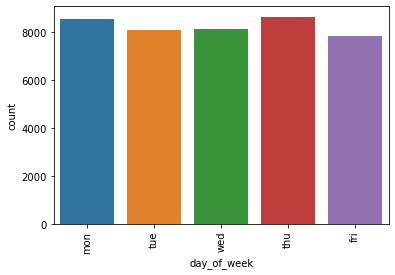

In [17]:
univariate_cat(bank,'day_of_week')

In [68]:
((round((((bank[bank['y']=='yes']['day_of_week']).value_counts())/(bank['day_of_week'].value_counts())*100),0)).astype(str))+ "%"

fri    11.0%
mon    10.0%
thu    12.0%
tue    12.0%
wed    12.0%
Name: day_of_week, dtype: object

Total missing values : 0

Total count of unique categories: 3

Unique categories :
['nonexistent', 'failure', 'success']
Value count and %
              Count percentage
nonexistent  35563     86.34%
failure       4252     10.32%
success       1373      3.33%


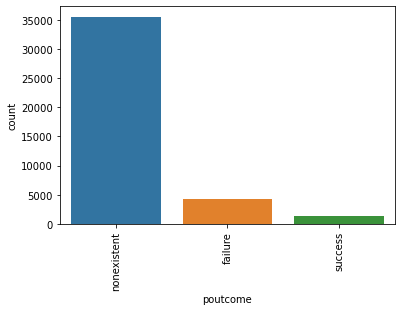

In [69]:
univariate_cat(bank,'poutcome')

In [70]:
bank['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['no', 'yes']
Value count and %
      Count percentage
no   36548     88.73%
yes   4640     11.27%


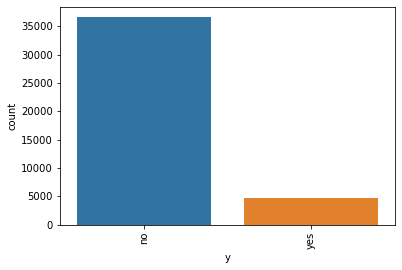

In [71]:
univariate_cat(bank,'y')

* As you can see the the target variable is imbalance

## Q2. Perform the following Exploratory Data Analysis tasks: [10]
* a. Missing Value Analysis
* b. Label Encoding wherever required
* c. Selecting important features based on Random Forest d. Handling unbalanced data using SMOTE
* e. Standardize the data using the anyone of the scalers provided by sklearn

#### Missing value Analysis

In [72]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

* There are 0 missing value 

#### Label Encoding

In [73]:
ag={"y":{"yes":1, "no":0}}
bank.replace(ag, inplace=True)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,Pink-collar,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,Pink-collar,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,Pink-collar,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,White-collar,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,Pink-collar,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [74]:
bank=pd.get_dummies(bank,drop_first=True)

In [75]:
bank.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


#### Selecting important features based on Random Forest

In [76]:
x=bank.iloc[:, bank.columns != 'y']
y=bank.iloc[:, bank.columns == 'y' ]

In [77]:
y.value_counts()

y
0    36548
1     4640
dtype: int64

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [81]:
sel=SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train,y_train)

/Users/anuraggupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:355: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestClassifier())

In [83]:
sel.get_feature_names_out()  

array(['age', 'duration', 'campaign', 'pdays', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'poutcome_success'], dtype=object)

#### SMOTE

In [84]:
sm=SMOTE(random_state=0,k_neighbors=7)
x_train_smote,y_train_smote=sm.fit_resample(x_train,y_train)

In [85]:
y_train_smote.value_counts()

y
0    25579
1    25579
dtype: int64

### Standardize the data using the anyone of the scalers provided by sklearn

In [86]:
scaler=StandardScaler()

x_train1=scaler.fit_transform(x_train_smote)
x_trains=pd.DataFrame(x_train1,columns=x_train.columns)

# Transforming the test data
x_test1=scaler.transform(x_test)
x_tests=pd.DataFrame(x_test1,columns=x_test.columns)


### Q3. Build the following Supervised Learning models:
* Logistic Regression
* AdaBoost
* Naïve Bayes
* KNN
* SVM

#### Logistic Regression

In [87]:
logR=LogisticRegression()

In [88]:
model_log=logR.fit(x_trains,y_train_smote)

/Users/anuraggupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [89]:
models_report=pd.DataFrame()
y_pred_rf=model_log.predict(x_tests)
tm2=pd.Series({'Model':'Logistic Regression',
               'ROC Score': metrics.roc_auc_score(y_test,y_pred_rf),
               'Precision Score': metrics.precision_score(y_test,y_pred_rf),
               'Recall Score': metrics.recall_score(y_test,y_pred_rf),
               'Accuracy Score': metrics.accuracy_score(y_test,y_pred_rf),
               'Kappa Score' : metrics.cohen_kappa_score(y_test,y_pred_rf)})

model_logistic_report=models_report.append(tm2,ignore_index=True)
model_logistic_report

/var/folders/x_/sng69whx6gx_7r13bbztjcd00000gn/T/ipykernel_1481/1582893976.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_logistic_report=models_report.append(tm2,ignore_index=True)


,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Logistic Regression,0.748993,0.561493,0.552594,0.901271,0.501456


#### Adaboost

In [90]:
adb=AdaBoostClassifier()
model_adb=adb.fit(x_trains, y_train_smote)

/Users/anuraggupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [91]:
models_report=pd.DataFrame()
y_pred_rf=model_adb.predict(x_tests)
tm2=pd.Series({'Model':'AdaBoost',
               'ROC Score': metrics.roc_auc_score(y_test,y_pred_rf),
               'Precision Score': metrics.precision_score(y_test,y_pred_rf),
               'Recall Score': metrics.recall_score(y_test,y_pred_rf),
               'Accuracy Score': metrics.accuracy_score(y_test,y_pred_rf),
               'Kappa Score' : metrics.cohen_kappa_score(y_test,y_pred_rf)})

model_adb_report=models_report.append(tm2,ignore_index=True)
model_adb_report

/var/folders/x_/sng69whx6gx_7r13bbztjcd00000gn/T/ipykernel_1481/382103687.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_adb_report=models_report.append(tm2,ignore_index=True)


,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,AdaBoost,0.754771,0.547091,0.569164,0.898681,0.500719


#### NaiveByes

In [92]:
nb_mn = GaussianNB()
model_nb=nb_mn.fit(x_trains, y_train_smote)

/Users/anuraggupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [93]:
models_report=pd.DataFrame()
y_pred_rf=model_nb.predict(x_tests)
tm2=pd.Series({'Model':'NaiveByes',
               'ROC Score': metrics.roc_auc_score(y_test,y_pred_rf),
               'Precision Score': metrics.precision_score(y_test,y_pred_rf),
               'Recall Score': metrics.recall_score(y_test,y_pred_rf),
               'Accuracy Score': metrics.accuracy_score(y_test,y_pred_rf),
               'Kappa Score' : metrics.cohen_kappa_score(y_test,y_pred_rf)})

model_nb_report=models_report.append(tm2,ignore_index=True)
model_nb_report

/var/folders/x_/sng69whx6gx_7r13bbztjcd00000gn/T/ipykernel_1481/3751912181.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_nb_report=models_report.append(tm2,ignore_index=True)


,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,NaiveByes,0.687939,0.227442,0.659222,0.710205,0.205499


#### KNN

In [94]:
knn=KNeighborsClassifier()
model_KNN=knn.fit(x_trains, y_train_smote)

/Users/anuraggupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [95]:
models_report=pd.DataFrame()
y_pred_rf=model_KNN.predict(x_tests)
tm2=pd.Series({'Model':'KNN',
               'ROC Score': metrics.roc_auc_score(y_test,y_pred_rf),
               'Precision Score': metrics.precision_score(y_test,y_pred_rf),
               'Recall Score': metrics.recall_score(y_test,y_pred_rf),
               'Accuracy Score': metrics.accuracy_score(y_test,y_pred_rf),
               'Kappa Score' : metrics.cohen_kappa_score(y_test,y_pred_rf)})

model_knn_report=models_report.append(tm2,ignore_index=True)
model_knn_report

/var/folders/x_/sng69whx6gx_7r13bbztjcd00000gn/T/ipykernel_1481/4013636230.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_knn_report=models_report.append(tm2,ignore_index=True)


,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,KNN,0.676738,0.468137,0.412824,0.881363,0.372708


#### SVM

In [97]:
svc=svm.SVC()
model_svc=svc.fit(x_trains, y_train_smote)

/Users/anuraggupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [98]:
models_report=pd.DataFrame()
y_pred_rf=model_svc.predict(x_tests)
tm2=pd.Series({'Model':'SVC',
               'ROC Score': metrics.roc_auc_score(y_test,y_pred_rf),
               'Precision Score': metrics.precision_score(y_test,y_pred_rf),
               'Recall Score': metrics.recall_score(y_test,y_pred_rf),
               'Accuracy Score': metrics.accuracy_score(y_test,y_pred_rf),
               'Kappa Score' : metrics.cohen_kappa_score(y_test,y_pred_rf)})

model_svc_report=models_report.append(tm2,ignore_index=True)
model_svc_report

/var/folders/x_/sng69whx6gx_7r13bbztjcd00000gn/T/ipykernel_1481/3614858559.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_svc_report=models_report.append(tm2,ignore_index=True)


,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,SVC,0.73812,0.603347,0.519452,0.907664,0.50703


### Q4. Tabulate the performance metrics of all the above models and tell which model performs better in predicting if the client will subscribe to term deposit or not

In [99]:
col=["Model","ROC Score","Precision Score",'Recall Score',"Accuracy Score","Kappa Score"]
model_rf=pd.DataFrame(columns=col)
model_rf=model_rf.append([model_logistic_report,model_adb_report,model_knn_report,model_svc_report,model_nb_report])
model_rf

/var/folders/x_/sng69whx6gx_7r13bbztjcd00000gn/T/ipykernel_1481/2915228358.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_rf=model_rf.append([model_logistic_report,model_adb_report,model_knn_report,model_svc_report,model_nb_report])


,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Logistic Regression,0.748993,0.561493,0.552594,0.901271,0.501456
0,AdaBoost,0.754771,0.547091,0.569164,0.898681,0.500719
0,KNN,0.676738,0.468137,0.412824,0.881363,0.372708
0,SVC,0.73812,0.603347,0.519452,0.907664,0.50703
0,NaiveByes,0.687939,0.227442,0.659222,0.710205,0.205499


# BEST MODEL IS ADABOOST